9/28/17

Fitting DLS data using method of culumants, as outlined in Frisken Method of Culumants

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
import scipy.optimize
import scipy.misc
import scipy.stats

In [2]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
# First few rows include time, temp, etc. Not necessary
# dls_data is now an array of two colums: delay time tau and intensity autocorrelation g^2(tau)
f = open('CorrelationDLS.ASC','r')
lines = f.readlines()[27:242]
f.close()
tau = []
intensity = []

for line in lines:
    line = line.strip()
    columns = line.split()
    tau.append(float(columns[0]))
    intensity.append(float(columns[1]))
    
# Running into trouble since this isn't an array, this is a list! How do I make these arrays?

In [4]:
# Import the data as an array
dls_data = np.loadtxt("CorrelationDLS.asc", skiprows=27)
tau = dls_data[:,0]
intensity_ac = dls_data[:,1]

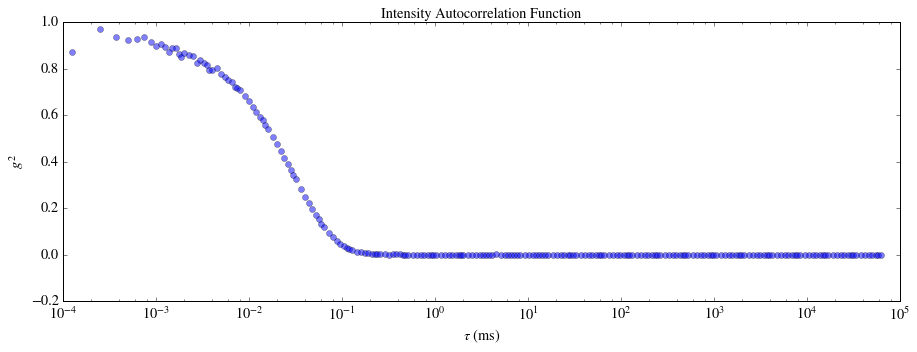

In [5]:
# Graph the tau vs. intensity autocorrelation function
# Plot tau on a log plot
plt.semilogx(tau, intensity_ac, 'bo', alpha = 0.5)
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')

For a polydisperse sample, autocorrelation of intensity function becomes a sum of decaying exponentials with different coefficients, rather than just a single expontetial. 

$ g_1(\tau) = \int (G(\Gamma ) exp(- \Gamma  \tau )  d \Gamma $



('best-fit parameters: ', array([ 33.15515352,   0.92445056]))
[[  3.56710901e-02   1.70150083e-04]
 [  1.70150083e-04   2.47974155e-06]]


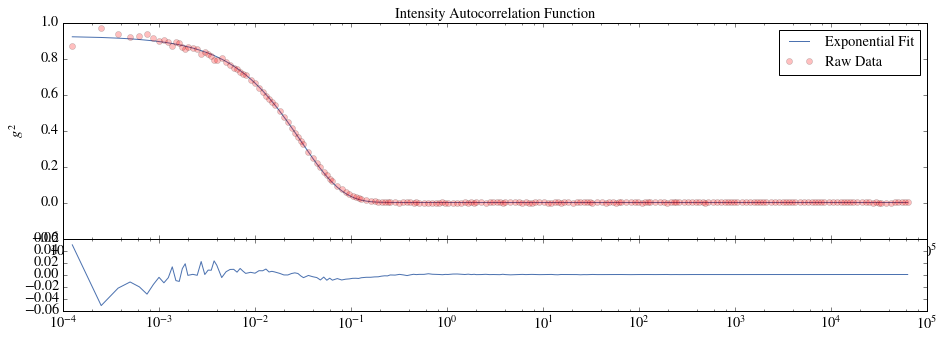

In [6]:
# Fitting data on g(t) = Beta*e**(-C1*t + C2*t^2 - C3*t^3...)
# Let's start by only including 1st order constants in the exponent, then include 2, etc. 
def fitmodel_1(t, C1, beta):
    return beta*np.e**(-C1*t)

popt, pcov = scipy.optimize.curve_fit(fitmodel_1, tau, intensity)
print ("best-fit parameters: ", popt)
print pcov


fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel_1(tau, popt[0], popt[1]), label='Exponential Fit')
plt.semilogx(tau, intensity, 'ro', alpha = 0.25, label="Raw Data")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

# Also should plot the residuals
frame2=fig1.add_axes((.1,.1,.8,.2))
residuals = fitmodel_1(tau, popt[0], popt[1]) - intensity
plt.semilogx(tau, residuals)

Assuming that the baseline is equal to 1, we can write

$ g_2(\tau) = 1 + \beta exp( -2 \Gamma \tau + \kappa_2 \tau^2 - \kappa_3 \tau^3 /3 ) $

The values of kappa (the cumulants) are:

$ \kappa_1 = \overline{\Gamma} $ 

$ \kappa_2 = \mu_2 $

$ \kappa_3 = \mu_3 $

where 

$ \mu_m = \int G (\Gamma) (\Gamma - \overline{\Gamma})^m d \Gamma$

('best-fit parameters: ', array([  3.31551532e+01,   3.58811736e-04,   9.24450561e-01]))
[[  1.29431723e-01   2.50968482e+00   4.29226058e-04]
 [  2.50968482e+00   6.72972836e+01   6.92562015e-03]
 [  4.29226058e-04   6.92562015e-03   3.20415425e-06]]


/Users/carolinemartin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in power


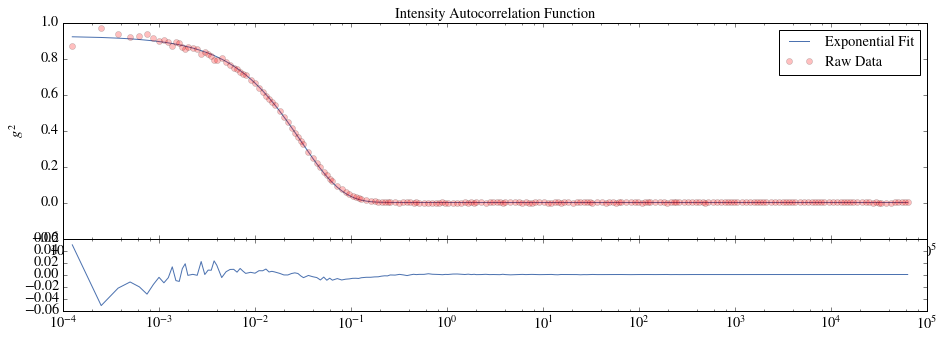

In [7]:
# Now we need to add the second order constant to our fit

# Fitting data on g(t) = Beta*e**(-C1*t + C2*t^2 - C3*t^3...)

def fitmodel_2(t, C1, kappa_2, beta):
    return beta*np.e**(-C1*t + kappa_2 * t**2)

# Provide an initial guess based on the first fit. Use the same beta and C1, and make up a kappa_2
guess = np.array([33.15515352, -0.02, 0.92445056])

popt, pcov = scipy.optimize.curve_fit(fitmodel_2, tau, intensity,p0 =guess)
print ("best-fit parameters: ", popt)
print pcov
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel_2(tau, popt[0], popt[1], popt[2]), label='Exponential Fit')
plt.semilogx(tau, intensity, 'ro', alpha = 0.25, label="Raw Data")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

frame2=fig1.add_axes((.1,.1,.8,.2))
residuals = fitmodel_2(tau, popt[0], popt[1], popt[2]) - intensity
plt.semilogx(tau, residuals)

('best-fit parameters: ', array([  35.64844426,   86.15174291,  413.19088639,    0.93079409]))
[[  2.42189547e-01   8.97776154e+00   6.87701975e+01   6.33085047e-04]
 [  8.97776154e+00   4.07979800e+02   3.48464492e+03   1.99315071e-02]
 [  6.87701975e+01   3.48464492e+03   3.36325069e+04   1.41982970e-01]
 [  6.33085047e-04   1.99315071e-02   1.41982970e-01   3.25635560e-06]]


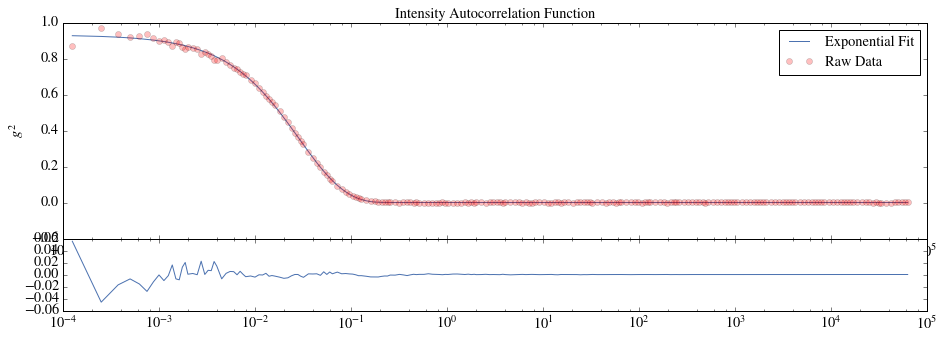

In [8]:
# Now we need to add the third order constant to our fit

# Fitting data on g(t) = Beta*e**(-C1*t + C2*t^2 - C3*t^3...)

def fitmodel_3(t, C1, kappa_2, kappa_3, beta):
    return beta*np.e**(-C1*t + kappa_2 * t**2 - kappa_3*t**3)

# Provide an initial guess based on the first fit. Use the same beta and C1, and make up a kappa_2
guess = np.array([33.15515352, -0.02, 0.01, 0.92445056])

popt, pcov = scipy.optimize.curve_fit(fitmodel_3, tau, intensity,p0 =guess)
print ("best-fit parameters: ", popt)
print pcov
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel_3(tau, popt[0], popt[1], popt[2], popt[3]), label='Exponential Fit')
plt.semilogx(tau, intensity, 'ro', alpha = 0.25, label="Raw Data")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

frame2=fig1.add_axes((.1,.1,.8,.2))
residuals = fitmodel_3(tau, popt[0], popt[1], popt[2], popt[3]) - intensity
plt.semilogx(tau, residuals)

Should I be using equation 23 to fit this? I'm a little unsure how to unpack Gamma from the fits I've made.

Try fitting to equation 23:

$ g^{(2)} = B + \beta e^{-2 \overline{\Gamma}\tau} (1 + \frac{\mu_2}{2!} \tau^2 - \frac{\mu_3}{3!} \tau^3 )$ 


('best-fit parameters: ', array([  6.28034640e-04,   9.23924097e-01,   1.66040624e+01]))
[[  3.46005733e-07  -2.93420099e-07   1.42522572e-05]
 [ -2.93420099e-07   2.72880436e-06   7.31755426e-05]
 [  1.42522572e-05   7.31755426e-05   9.53953982e-03]]


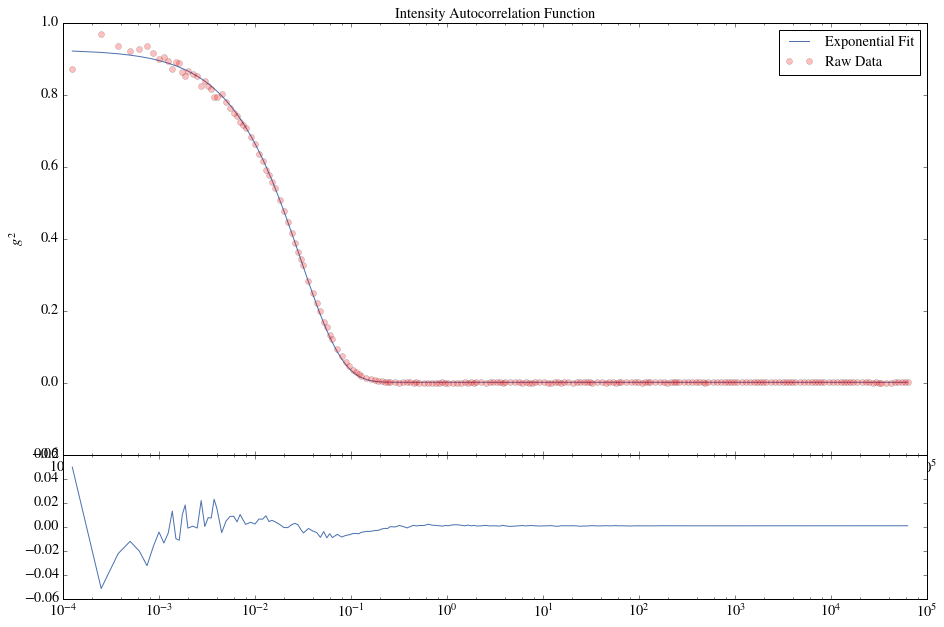

In [16]:
# First fit just with B, beta, and Gamma

def fitmodel(t, B, beta, Gamma):
    return B + beta*np.e**(-2*Gamma*t)

popt, pcov = scipy.optimize.curve_fit(fitmodel, tau, intensity)
print ("best-fit parameters: ", popt)
print pcov

fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel(tau, popt[0], popt[1], popt[2]), label='Exponential Fit')
plt.semilogx(tau, intensity, 'ro', alpha = 0.25, label="Raw Data")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

frame2=fig1.add_axes((.1,.1,.8,.2))
residuals = fitmodel(tau, popt[0], popt[1], popt[2]) - intensity
plt.semilogx(tau, residuals)

Question: Here, B is fitted at very close to 0, and the graph obviously decays to 0. Why is it then that in the cumulants paper the fit for B is always around 1, and it assumed to be 1 at times?

('best-fit parameters: ', array([  1.62555955e-05,   9.29929539e-01,   1.75933839e+01,
         1.15005165e+02]))
[[  3.02496895e-07  -3.30429189e-07  -1.30290803e-06  -1.65997510e-03]
 [ -3.30429189e-07   3.31383026e-06   2.32386120e-04   2.09060376e-02]
 [ -1.30290803e-06   2.32386120e-04   3.76371609e-02   3.59244107e+00]
 [ -1.65997510e-03   2.09060376e-02   3.59244107e+00   4.30813606e+02]]


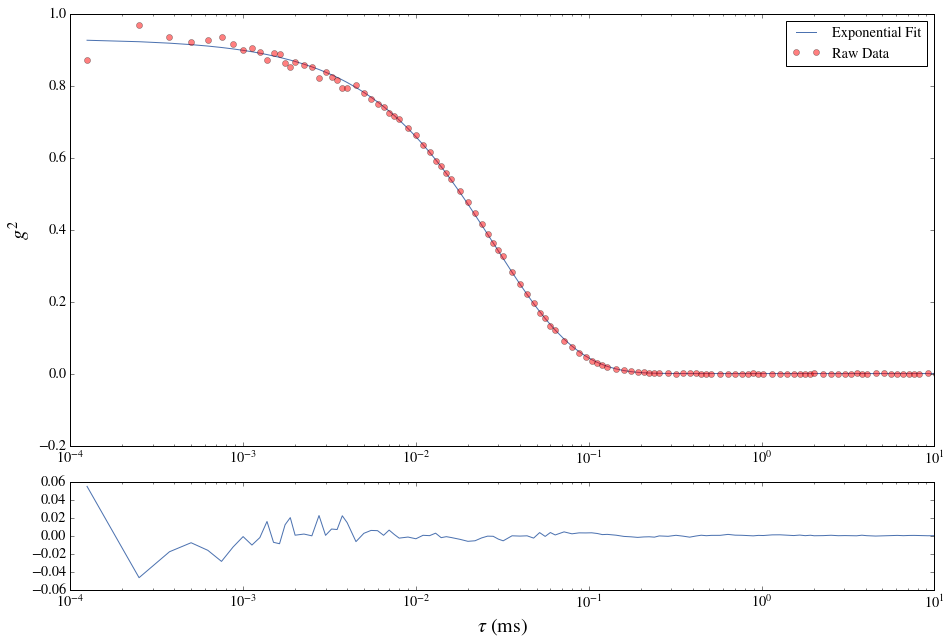

In [10]:
# Fit with more complexity

def fitmodel(t, B, beta, Gamma, mu_2):
    return B + beta*np.e**(-2*Gamma*t)* (1 + (mu_2/2 *t**2))

popt, pcov = scipy.optimize.curve_fit(fitmodel, tau, intensity_ac)
print ("best-fit parameters: ", popt)
print pcov

#plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel(tau, popt[0], popt[1], popt[2], popt[3]), label='Exponential Fit')
plt.semilogx(tau, intensity_ac, 'ro', alpha = 0.5, label="Raw Data")
plt.xlim(10**-4, 10)
#plt.title("Method of Cumulants: Second Order Cumulant", fontsize=20)
plt.ylabel(r'$g^2$', fontsize=20)
plt.legend()

frame2=fig1.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt[0], popt[1], popt[2], popt[3]) - intensity_ac
plt.semilogx(tau, residuals)
plt.xlim(10**-4, 10)
plt.xlabel(r'$\tau $ (ms)', fontsize=20)

In [11]:
sum_res = sum(residuals**2)
print sum_res

0.00960665221719


('best-fit parameters: ', array([  1.83144681e-04,   9.31251478e-01,   1.79897572e+01,
         2.05578315e+02,   2.71710875e+03]))
[[  3.05790668e-07  -2.77615180e-07   1.46997455e-05   2.25440192e-03
    1.25051018e-01]
 [ -2.77615180e-07   3.76425718e-06   3.74072075e-04   5.46955260e-02
    9.93394759e-01]
 [  1.46997455e-05   3.74072075e-04   8.07149354e-02   1.37721264e+01
    3.02807162e+02]
 [  2.25440192e-03   5.46955260e-02   1.37721264e+01   2.80526613e+03
    7.08078315e+04]
 [  1.25051018e-01   9.93394759e-01   3.02807162e+02   7.08078315e+04
    2.15225061e+06]]


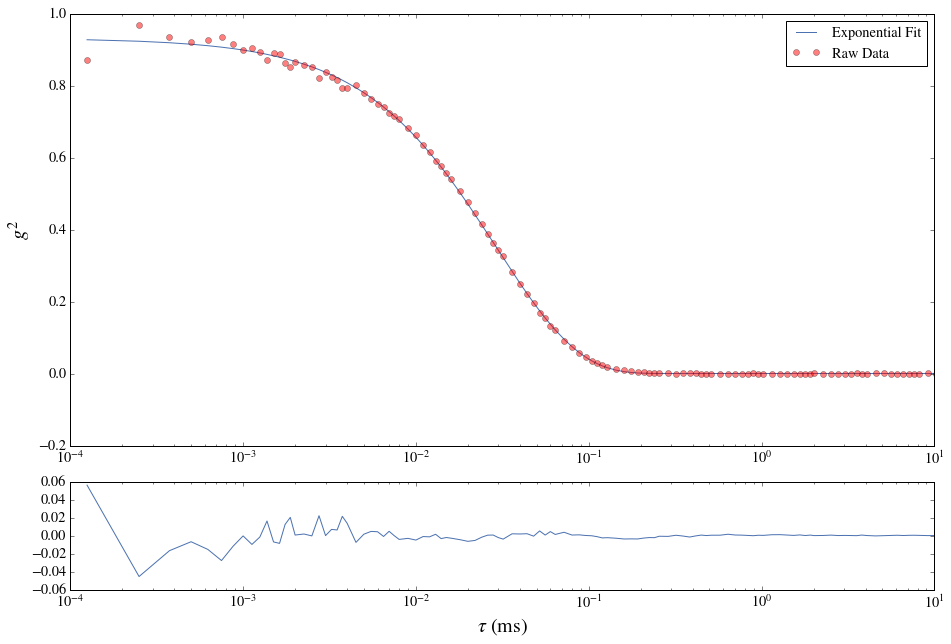

In [12]:
# Adding in a third power

def fitmodel(t, B, beta, Gamma, mu_2, mu_3):
    return B + beta*np.e**(-2*Gamma*t)* (1 + (mu_2/2 *t**2) - (mu_3/6 * t**3))

popt, pcov = scipy.optimize.curve_fit(fitmodel, tau, intensity_ac)
print ("best-fit parameters: ", popt)
print pcov

#plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.semilogx(tau, fitmodel(tau, popt[0], popt[1], popt[2], popt[3],popt[4]), label='Exponential Fit')
plt.semilogx(tau, intensity_ac, 'ro', alpha = 0.5, label="Raw Data")
plt.xlim(10**-4, 10)
#plt.title("Method of Cumulants: Third Order Cumulant", fontsize=20)
plt.ylabel(r'$g^2$', fontsize=20)
plt.legend()

frame2=fig1.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt[0], popt[1], popt[2], popt[3], popt[4]) - intensity_ac
plt.semilogx(tau, residuals)
plt.xlim(10**-4, 10)
plt.xlabel(r'$\tau $ (ms)', fontsize=20)

In [13]:
# Data taken at a scattering angle of 90 degrees with a 632.8 nm HeNe laser.

lam = 632.8e-9 # wavelength in meters
theta = np.pi # scattering angle in radians
n = 1.33200 # refractive index

q = (4*np.pi * n) / (lam) * np.sin(theta/2)

Gamma = popt[2] # exponetial constant from fit
D = (Gamma / q**2) /0.001 # Diffusion constant with conversion from ms to s
print D 

2.57116569271e-11


In [14]:
sum_res = sum(residuals**2)
print sum_res

0.00945011871125


In [15]:
# Comparing this to the value obtained by a simple exponential fit

D_exp = 4.73866280872e-11 # From previous analysis
 
# Hmmm. Same order of magnitude, but the difference really shouldn't be this big, should it?
# Percent difference
percent_difference = np.absolute((D_exp - D)/D_exp) * 100.00
print "The percent difference is ", str(percent_difference), "%"

# Yikes

The percent difference is  45.7406910663 %
